## Classification Of Plant Diseases Using CNN Model

In [1]:
# Import required packages
import os 
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get Path to Train and Valid folders
train_path = r'C:\Users\KIIT\PlantDatasetimages\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'
valid_path = r'C:\Users\KIIT\PlantDatasetimages\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'

# Get list of all subfolders for each Subset
train_dir = os.listdir(train_path)
valid_dir = os.listdir(valid_path)
# Check length of subfolders
len(train_dir), len(valid_dir)

(38, 38)

In [3]:
data_dir = r'C:\Users\KIIT\PlantDatasetimages\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + r"\train"
valid_dir = data_dir + r"\valid"
diseases = os.listdir(train_dir)

In [4]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___healthy                                              1692
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___Bacterial_spot                                       1838
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Pepper,_bell___healthy                                       1988
Potato___Early_blight                                        1939
Potato___healthy                                             1824
Potato___Late_blight                                         1939
Raspberry___healthy                                          1781
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Strawberry___healthy                                         1824
Strawberry___Leaf_scorch                                     1774
Tomato___Bacterial_spot                                      1702
Tomato___Early_blight                                        1920
Tomato___healthy                                             1926
Tomato___Late_blight                                         1851
Tomato___Leaf_Mold                                           1882
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Target_Spot                                         1827
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961

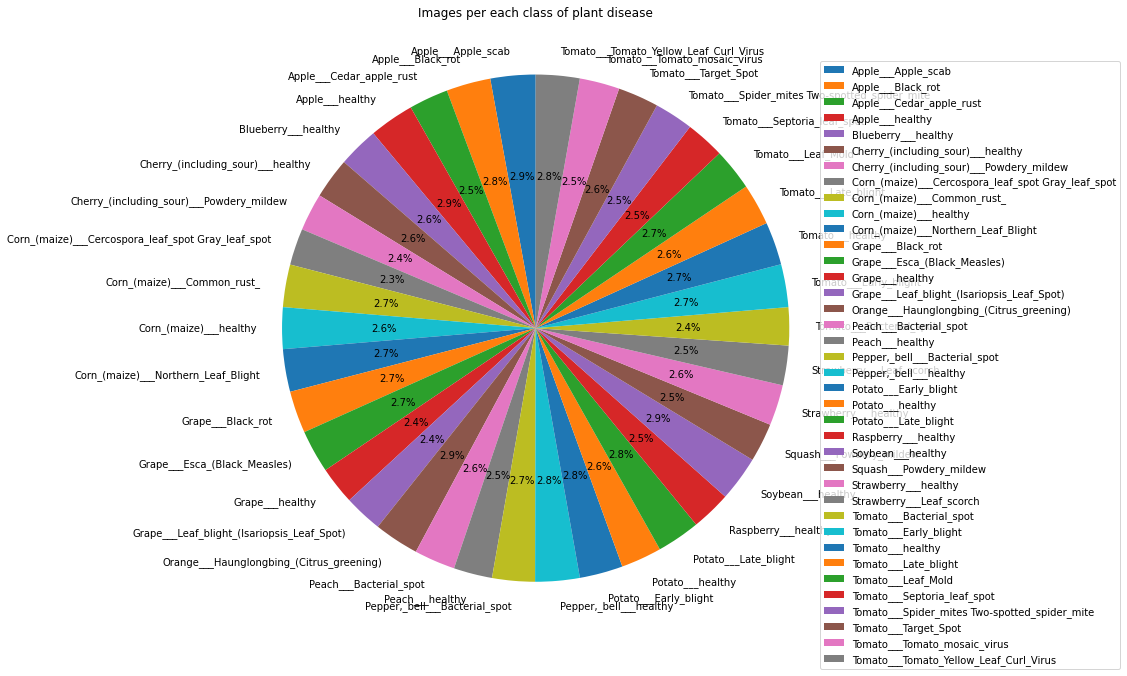

In [5]:
plt.figure(figsize=(10, 10))

# Calculate the percentage of each disease class
percentages = [(num / sum(nums.values())) * 100 for num in nums.values()]

# Plot the pie chart
plt.pie(percentages, labels=diseases, autopct='%1.1f%%', startangle=90)
plt.title('Images per each class of plant disease', pad=40 )

plt.axis('equal')  

# Add a legend
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

In [6]:
# Import required packages
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed for reproducibility
tf.random.set_seed(42)

# Get Path to Train and Valid folders
train_path = r'C:\Users\KIIT\PlantDatasetimages\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'
valid_path = r'C:\Users\KIIT\PlantDatasetimages\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch size
image_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [8]:
# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess the validation dataset
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


In [9]:
# Check the number of classes
num_classes = len(train_generator.class_indices)

In [13]:
from tensorflow.keras.applications import EfficientNetB0

# Use EfficientNetB0 as the base model
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Fine-tune the base model
base_model.trainable = True

# Select a range of layers to fine-tune
fine_tune_at = 100

# Freeze all layers before the fine-tune layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [15]:
# Build the CNN model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Set the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [1]:
# Set the number of epochs
num_epochs = 60

# Calculate the count of samples in each class
class_counts = np.bincount(train_generator.labels)

# Calculate the total number of samples
total_samples = np.sum(class_counts)

# Calculate the class weights
class_weights = {class_idx: total_samples / (num_classes * class_counts[class_idx])
                 for class_idx in range(num_classes)}

# Train the model and get training history
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=valid_generator,
    class_weight=class_weights
)

<IPython.core.display.Javascript object>

NameError: name 'train_generator' is not defined

In [2]:
save_dir = r'C:\Users\KIIT\PlantDatasetimages'
save_path = os.path.join(save_dir, 'model.h5')
model.save(save_path)

# Check if the model file exists
if os.path.exists(save_path):
    print("Model saved successfully!")
else:
    print("Failed to save the model.")


<IPython.core.display.Javascript object>

NameError: name 'model' is not defined

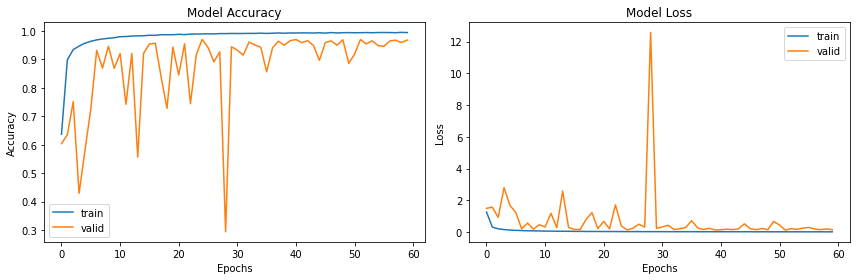

In [18]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.tight_layout()
plt.show()

110/110 [==============================] - 98s 873ms/step


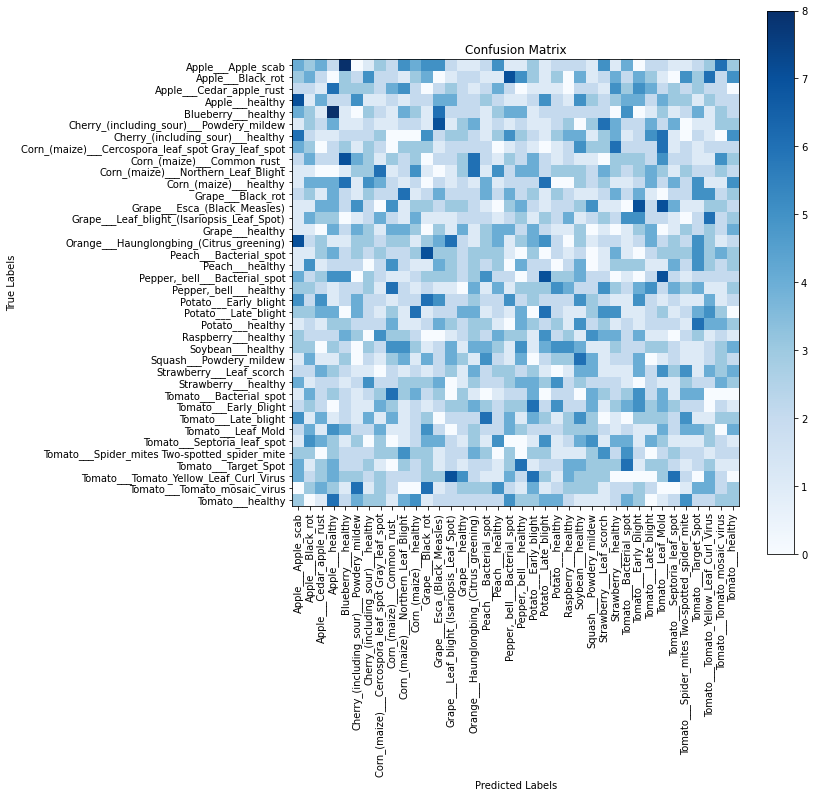

In [19]:
from sklearn.metrics import confusion_matrix


# Get the predictions for the validation dataset
valid_predictions = model.predict(valid_generator)

# Convert predictions and ground truth labels to class indices
valid_pred_classes = np.argmax(valid_predictions, axis=1)
valid_true_classes = valid_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(valid_true_classes, valid_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(num_classes), train_generator.class_indices, rotation=90)
plt.yticks(np.arange(num_classes), train_generator.class_indices)
plt.colorbar()

plt.show()

1/1 [==============================] - 0s 64ms/step


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16732\2721470256.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


1/1 [==============================] - 0s 65ms/step
Image				Predicted Label
----------------------------------------------
AppleCedarRust1.JPG 		 Apple___Cedar_apple_rust
AppleCedarRust2.JPG 		 Apple___Cedar_apple_rust
AppleCedarRust3.JPG 		 Tomato___Late_blight
AppleCedarRust4.JPG 		 Apple___Cedar_apple_rust
AppleScab1.JPG 		 Apple___Apple_scab
AppleScab2.JPG 		 Apple___Apple_scab
AppleScab3.JPG 		 Apple___Apple_scab
CornCommonRust1.JPG 		 Corn_(maize)___Common_rust_
CornCommonRust2.JPG 		 Corn_(maize)___Common_rust_
CornCommonRust3.JPG 		 Corn_(maize)___Common_rust_
PotatoEarlyBlight1.JPG 		 Potato___Early_blight
PotatoEarlyBlight2.JPG 		 Potato___Early_blight
PotatoEarlyBlight3.JPG 		 Potato___Early_blight
PotatoEarlyBlight4.JPG 		 Potato___Early_blight
PotatoEarlyBlight5.JPG 		 Potato___Early_blight
PotatoHealthy1.JPG 		 Potato___healthy
PotatoHealthy2.JPG 		 Potato___healthy
TomatoEarlyBlight1.JPG 		 Tomato___Early_blight
TomatoEarlyBlight2.JPG 		 Tomato___Septoria_leaf_spot
Toma

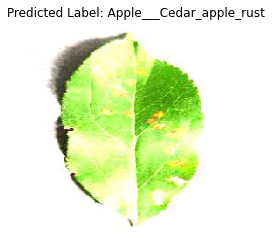

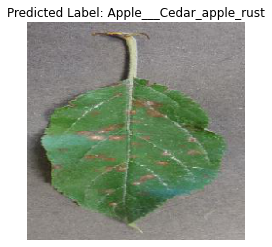

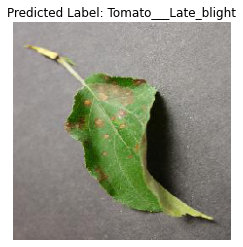

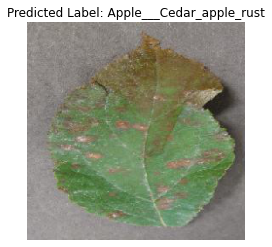

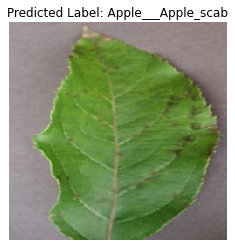

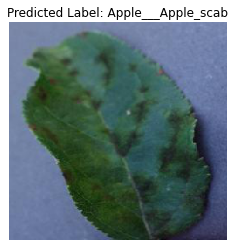

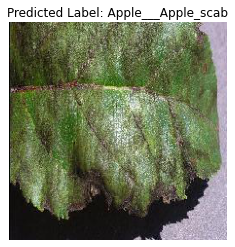

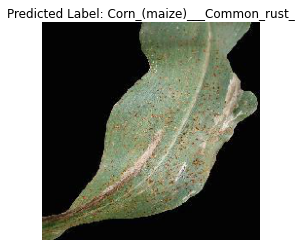

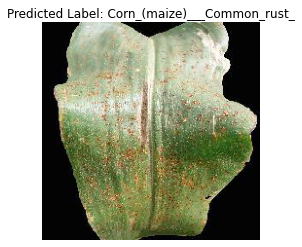

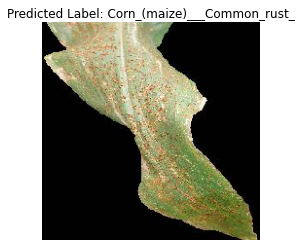

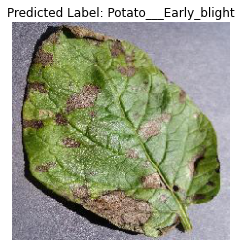

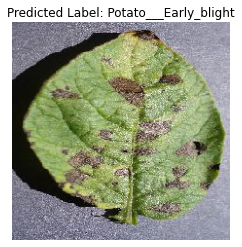

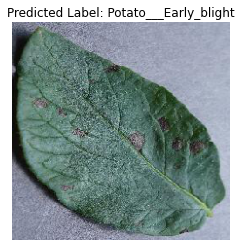

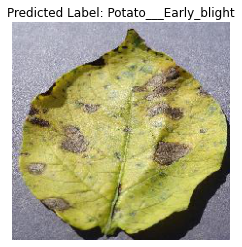

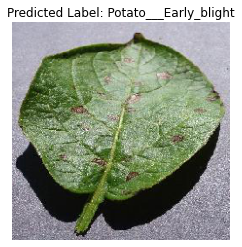

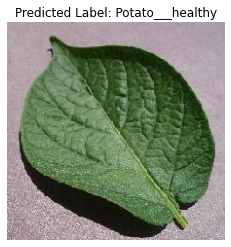

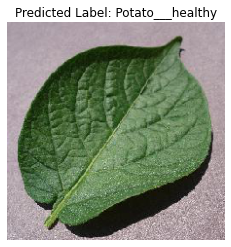

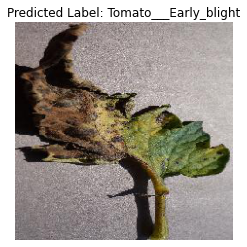

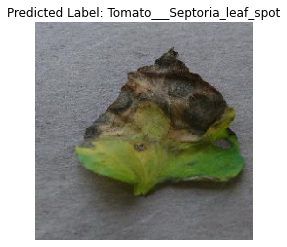

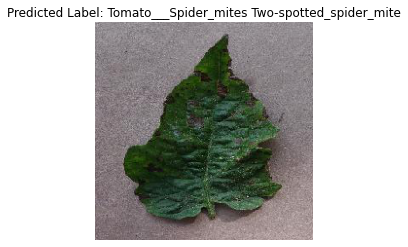

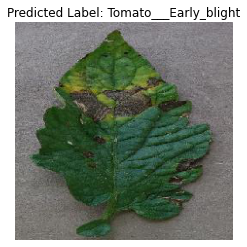

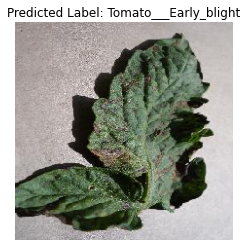

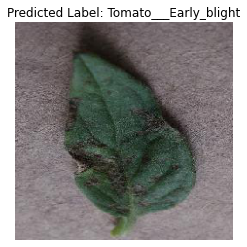

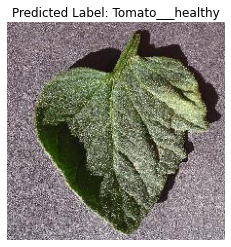

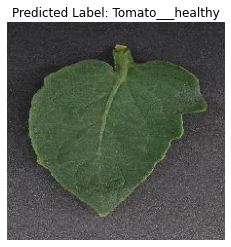

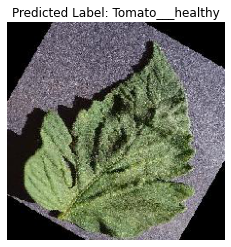

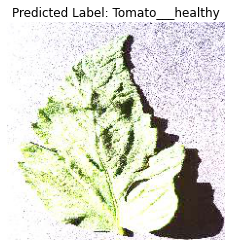

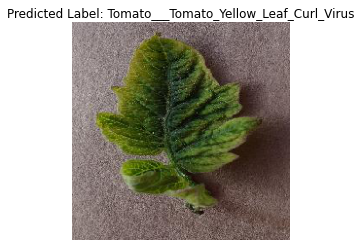

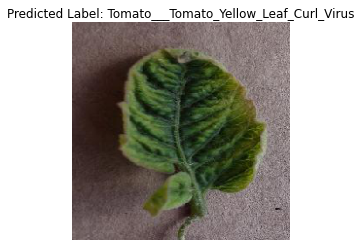

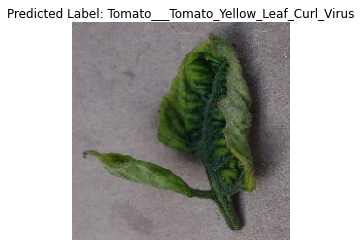

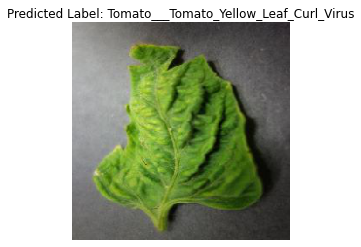

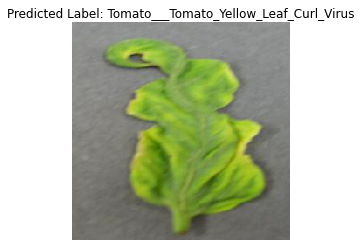

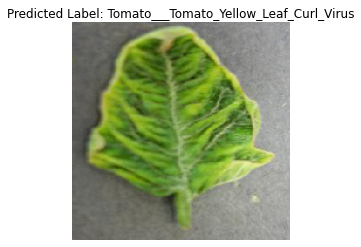

In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

def test_model(model_path, test_dir, download_output=False):
    # Load the trained model
    model = load_model(model_path)

    # Get the class labels from the training generator
    class_labels = list(train_generator.class_indices.keys())

    # Initialize lists to store the predicted labels and corresponding image paths
    predicted_labels = []
    image_paths = []

    # Iterate over the images in the test directory
    for image_file in os.listdir(test_dir):
        # Create the image file path
        image_path = os.path.join(test_dir, image_file)
        image_paths.append(image_path)

        # Load and preprocess the image
        image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(image) / 255.0
        image_array = np.expand_dims(image_array, axis=0)

        # Make predictions
        prediction = model.predict(image_array)
        predicted_label = class_labels[np.argmax(prediction)]
        predicted_labels.append(predicted_label)

        # Display the image with the predicted label
        plt.figure()
        plt.imshow(image)
        plt.title("Predicted Label: " + predicted_label)
        plt.axis('off')

    # Print the predicted labels and corresponding image paths in a tabular format
    print("Image\t\t\t\tPredicted Label")
    print("----------------------------------------------")
    for i in range(len(predicted_labels)):
        print(os.path.basename(image_paths[i]), "\t\t", predicted_labels[i])

    # Save the entire output as a single JPG image
    if download_output:
        output_image = Image.new('RGB', (600, 300 * len(predicted_labels)), color=(255, 255, 255))
        y_offset = 0
        for i in range(len(predicted_labels)):
            image = Image.open(image_paths[i])
            output_image.paste(image, (0, y_offset))
            draw = ImageDraw.Draw(output_image)
            draw.text((image.size[0] + 10, y_offset + 10), predicted_labels[i], fill=(0, 0, 0))
            y_offset += image.size[1] + 10
        output_image.save("output.jpg")

# Specify the path to the trained model and the test directory
model_path = r'C:\Users\KIIT\PlantDatasetimages\model.h5'
test_directory = r'C:\Users\KIIT\PlantDatasetimages\test\test'

# Call the test_model function
test_model(model_path, test_directory, download_output=True)